In [1]:
import theano
import theano.tensor as T
import lasagne
import h5py
import numpy as np
import sys

sys.path.append("..")
from networks import vnet

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)


In [3]:
f = h5py.File("../data/nyu_depth_combined_vnet2.hdf5")
images = np.array(f["images"][0:100]).astype(np.float32)
images_orig = images.copy().astype(np.uint8)
depths = np.array(f["depths"][0:100]).astype(np.float32)
mean = np.load("../data/nyu_depth_combined_vnet2.npy").astype(np.float32)

for i in range(images.shape[0]):
    images[i] = (images[i] - mean) / 68.


in_ = T.tensor4("in")
net = vnet(in_)
exp = lasagne.layers.get_output(net)

# load network weights from model file
model = "../data/vnet_spatial_grad_epoch_10.npz"
with np.load(model) as f:
     param_values = [f['arr_%d' % i] for i in range(len(f.files))]
lasagne.layers.set_all_param_values(net, param_values)

f = theano.function([in_], exp)









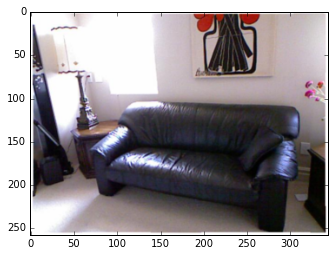

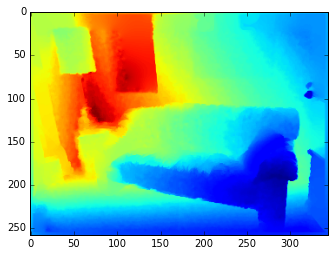

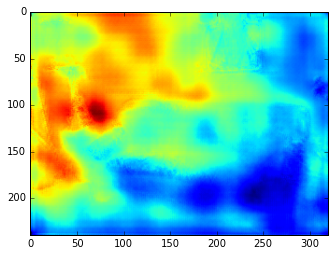

0.0314938


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
idx = 5
sample = images[idx,:,9:9+240, 12:12+320].astype(np.float32)

r = f(sample.reshape((1,3,240,320)))
r = np.exp(r)
plt.imshow(images_orig[idx].astype(np.uint8).transpose((1,2,0)))
plt.show()
plt.imshow(depths[idx])
plt.show()
plt.imshow(r.squeeze())
plt.show()
print np.mean((depths[idx,9:9+240, 12:12+320] - r.squeeze()) ** 2)